In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import scipy.stats as ss

In [42]:
import sys
sys.path.append("../functions/")
#for data preprocessing
import Scripts_Data_Processing
import imp

imp.reload(Scripts_Data_Processing)
from Scripts_Data_Processing import *
#for model fit
import Scripts_LogRegModels_v2
imp.reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

import Triplets_Correlations_Scatterplots
imp.reload( Triplets_Correlations_Scatterplots)
from  Triplets_Correlations_Scatterplots import *

import Single_LogRegModels
imp.reload(Single_LogRegModels)
from Single_LogRegModels import fit_model_singRL

import NoBrainer_Analysis_AllinOne
imp.reload( NoBrainer_Analysis_AllinOne)
from  NoBrainer_Analysis_AllinOne import *

import Wrappers
imp.reload(Wrappers)
from Wrappers import *

from Exclusion import *

import Plot_models
imp.reload(Plot_models)
from Plot_models import *

import Trait_Data
imp.reload(Trait_Data)
from Trait_Data import *

In [43]:
# Load & Prepare Questionnaire Data

## STAI

# 20-39 low
# 40-59 high
# 60-80 extreme

In [44]:
### STAI Day 1

In [45]:
STAI1_df = load_trait_data(sheet = 'STAI', header = 3, lastcol = 30, start = 43, end = 49)
STAI1_df = STAI1_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_1', 'Positive affect': 'PositiveAffect_1', 'Trait anxiety': 'TraitAnxiety_1', 'Trait anxiety sub': 'TraitAnxietySub_1', 'Trait depression sub': 'TraitDepressionSub_1'})
#STAI1_df.head()

In [46]:
### STAI Day 2

In [47]:
STAI2_df = load_trait_data(sheet = 'STAI2', header = 3, lastcol = 30, start = 43, end = 49)
STAI2_df = STAI2_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_2', 'Positive affect': 'PositiveAffect_2', 'Trait anxiety': 'TraitAnxiety_2', 'Trait anxiety sub': 'TraitAnxietySub_2', 'Trait depression sub': 'TraitDepressionSub_2'})
#STAI2_df.head()

In [48]:
### STAI Day 3

In [49]:
STAI3_df = load_trait_data(sheet = 'STAI3', header = 3, lastcol = 8, start = 43, end = 49)
STAI3_df = STAI3_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_3', 'Positive affect': 'PositiveAffect_3', 'Trait anxiety': 'TraitAnxiety_3', 'Trait anxiety sub': 'TraitAnxietySub_3', 'Trait depression sub': 'TraitDepressionSub_3'})
#STAI3_df.head()

## STAI Correlations Across Days

In [50]:
STAI_df = STAI1_df.merge(STAI2_df, 'left')
STAI_df = STAI_df.merge(STAI3_df, 'left', on='MID')
STAI_df['StateAnxiety'] = STAI_df[['StateAnxiety_1', 'StateAnxiety_2', 'StateAnxiety_3']].mean(axis=1)
STAI_df['PositiveAffect'] = STAI_df[['PositiveAffect_1', 'PositiveAffect_2', 'PositiveAffect_3']].mean(axis=1)
STAI_df['TraitAnxiety'] = STAI_df[['TraitAnxiety_1', 'TraitAnxiety_2', 'TraitAnxiety_3']].mean(axis=1)
STAI_df['TraitAnxietySub'] = STAI_df[['TraitAnxietySub_1', 'TraitAnxietySub_2', 'TraitAnxietySub_3']].mean(axis=1)
STAI_df['TraitDepressionSub'] = STAI_df[['TraitDepressionSub_1', 'TraitDepressionSub_2', 'TraitDepressionSub_3']].mean(axis=1)

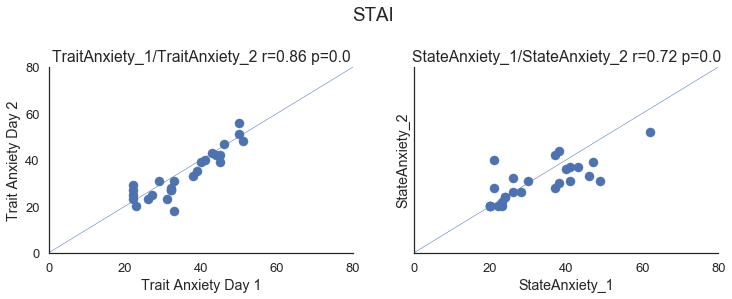

In [62]:
f = plotSTAI(STAI_df.dropna(subset=['StateAnxiety_1','StateAnxiety_2',
                                    'TraitAnxiety_1','TraitAnxiety_2']), 'STAI')


In [63]:
#STAI_df.head()

In [64]:
#plotTraitperSub(STAI_df, y0 = 'StateAnxiety', y1 = 'PositiveAffect', y2 = 'TraitAnxiety', y3 = 'TraitAnxietySub', y4 = 'TraitDepressionSub')


In [65]:
## BDI

#BDI Scale: 1-10 normal; 11-16 mild mood disturbance; 17-20 borderline clinical depression; 21-30 moderate depression; 31-40 severe depression; over 40 extreme depression

#vp10,22,31,33 mild mood disturbance


In [66]:
BDI_df = load_trait_data(sheet = 'BDI', header = 3, lastcol = 29, start = 23, end = 26)
BDI_df = BDI_df.rename(columns={'index': 'MID'})
#BDI_df.head()

In [67]:
#plotTraitperSub(BDI_df, y0 = 'BDI', y1 = 'Somatic-affective', y2 = 'Cognitive')


In [68]:
## MASQ

In [69]:
MASQ_df = load_trait_data(sheet = 'MASQ', header = 3, lastcol = 29, start = 92, end = 97)
MASQ_df = MASQ_df.rename(columns={'index': 'MID', 'General Distress: Mixed Symptoms': 'GD_Mixed', 'General Distress: Anxious Symptoms': 'GD_Anxious', 'Anxious Arousal': 'AnxiousArousal', 
                                  'General Distress: Depressive Symptoms': 'GD_Depressive', 'Anhedonic Depression': 'AnhedonicDepression'})
#MASQ_df.head()

In [70]:
#plotTraitperSub(MASQ_df, y0 = 'GD_Mixed', y1 = 'GD_Anxious', y2 = 'AnxiousArousal', y3 = 'GD_Depressive', y4 = 'AnhedonicDepression')


In [71]:
## IUS

In [72]:
IUS_df = load_trait_data(sheet = 'IUS', header = 2, lastcol = 29, start = 29, end = 32)
IUS_df = IUS_df.rename(columns={'index': 'MID'})
#IUS_df.head()

In [73]:
#plotTraitperSub(IUS_df, y0 = 'Unifactorial', y1 = 'Uncertainty has negative behavioural and self-referent implications', y2 = 'Uncertainty is unfair and spoils everything')


In [74]:
## PSWQ

In [75]:
PSWQ_df = load_trait_data(sheet = 'PSWQ', header = 3, lastcol = 29, start = 18, end = 19)
PSWQ_df = PSWQ_df.rename(columns={'index': 'MID'})
#PSWQ_df.head()

In [76]:
#plotTraitperSub(PSWQ_df, y0 = 'PSWQ')


In [77]:
## CES-D

In [78]:
CESD_df = load_trait_data(sheet = 'CES-D', header = 3, lastcol = 30, start = 22, end = 27)
CESD_df = CESD_df.rename(columns={'index': 'MID'})
#CESD_df.head()

In [79]:
#plotTraitperSub(CESD_df, y0 = 'CESD', y1 = 'Depressive affect/ mood', y2 = 'Positive affect/ well-being', y3 = 'Somatic subscale', y4 = 'Inter-personal relations')


In [80]:
## BFI2 - calculate scores in excel

In [81]:
BFI2_df = load_trait_data(sheet = 'BFI2', header = 3, lastcol = 30, start = 62, end = 70)
BFI2_df = BFI2_df.rename(columns={'index': 'MID'})
#BFI2_df.head()

In [82]:
#plotTraitperSub(BFI2_df, y0 = 'Extraversion', y1 = 'Agreeableness', y2 = 'Conscientiousness', y3 = 'Negative Emotionality', y4 = 'Open_Mindedness')


In [83]:
#plotTraitperSub(BFI2_df, y0 = 'Anxiety', y1 = 'Depression', y2 = 'Emotional Volatility')


In [84]:
## EPQ

In [85]:
EPQ_df = load_trait_data(sheet = 'EPQ', header = 3, lastcol = 29, start = 92, end = 96)
EPQ_df = EPQ_df.rename(columns={'index': 'MID'})
#EPQ_df.head()

In [86]:
#plotTraitperSub(EPQ_df, y0 = 'Neuroticism', y1 = 'Psychoticism', y2 = 'Lie', y3 = 'Extraversion')


In [87]:
## BB

In [88]:
BB_df = load_trait_data(sheet = 'BB', header = 3, lastcol = 29, start = 26, end = 30)
BB_df = BB_df.rename(columns={'index': 'MID'})
#BB_df.head()

In [89]:
#plotTraitperSub(BB_df, y0 = 'BIS', y1 = 'BAS drive', y2 = 'BAS fun seeking', y3 = 'BAS reward responsiveness')


In [90]:
## OCIR - calculate scores in excel file
# Scores are generated by adding the item scores. The possible range of scores is 0-72. Mean
# score for persons with OCD is 28.0 (SD = 13.53). Recommended cutoff score is 21, with scores at
# or above this level indicating the likely presence of OCD. 

# This is true vor vp22 and vp38 (latter is right at cut off)

In [91]:
OCIR_df = load_trait_data(sheet = 'OCIR', header = 3, lastcol = 29, start = 20, end = 21)
OCIR_df = OCIR_df.rename(columns={'index': 'MID'})
#OCIR_df.head()

In [92]:
#plotTraitperSub(OCIR_df, y0 = 'OCIR')


In [93]:
# Load and prepare model param data (triplets)

In [94]:
## model fit and no brainer

### gainloss

In [95]:
df_list = []
vp_perform_gainloss_list = []
vp_nb_gainloss_list = []
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30', '31',
           '32', '33', '34', '35', '36', '37', '38', '39', '40']
for vp in vp_list:
    path = os.path.join(os.getcwd(),'..','data','data_gainloss_logfiles','vp' + vp + '_gainloss_processed.csv')
    df = pd.read_csv(path, sep=",")
    #preprocess gainloss data
    df=preprocess_gainloss(df)
    #preprocess data
    df = preprocess(df)
    #store prepocessed data in list that contains data for all subjects (for later analysis)
    df_list.append(df)
    #create subset with unambiguous trials for no brainer analysis
    nb_df = drop_ambi_trials(df)
    #create variables indicating whether left or right was the better option
    better_choice_gainloss(nb_df)
    #indicate whether the better box was chosen
    nb_df = right_choice(nb_df)
    #only keep trials that are 'no brainers'
    nb_df = keep_nobrainers(nb_df)
    #calculate performance
    vp_perform_gainloss = ['vp' + vp, vp_perf(nb_df)]
    #store each vp performance in list
    vp_perform_gainloss_list.append(vp_perform_gainloss)
    #vp performance sectionwise
    vp_nb_gainloss = nb_df.groupby('section').mean().add_prefix('gainloss_')[['gainloss_choseBetter']]
    vp_nb_gainloss['MID'] = 'vp'+ vp
    vp_nb_gainloss_list.append(vp_nb_gainloss)
    
#make dataframe for nb performance
nobrainer_gainloss = pd.DataFrame(vp_perform_gainloss_list,columns=['MID','nbperf'])

#dataframe for single subject (last one) to try out code
gainloss_ls_df = df

#Merge dataframe list to single dataframe. "inner": Just take columns which exist in all dataframes    
gainloss_df = pd.concat(df_list, ignore_index = True, join = 'inner') 

/Users/chris/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/chris/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [96]:
### shock

In [97]:
df_list = []
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']
vp_perform_shock_list = []
vp_nb_shock_list = []
section_list = ['1', '2', '3']
for vp in vp_list:
    df = []
    for sec in section_list:
        path = os.path.join(os.getcwd(),'..','data','data_shock_logfiles','Expt1Pain_Behaviour_vp' + vp + '_' + sec + '.txt')
        df_dummy = pd.read_csv(path, sep="\t", skiprows = [0])
        df_dummy = df_dummy[:-1] #deletes last row of each section as it does not contain trial data
        df_dummy['MID'] = 'vp'+ vp
        df_dummy['section'] = sec
        df_dummy.columns = df_dummy.columns.str.replace(' ','')
        df.append(df_dummy)
    
    #create a df that contains data from all sections    
    df = pd.concat(df, ignore_index = True, join = 'inner')
    #preprocess shock data
    df = preprocess_shock(df)
    #preprocess data
    df = preprocess(df)
    #store prepocessed data in list that contains data for all subjects (for later analysis)
    df_list.append(df)
    #create subset with unambiguous trials for no brainer analysis
    nb_df = drop_ambi_trials(df)
    #create variables indicating whether left or right was the better option
    better_choice_shock(nb_df)
    #indicate whether the better box was chosen
    nb_df = right_choice(nb_df)
    #only keep trials that are 'no brainers'
    nb_df = keep_nobrainers(nb_df)
    #calculate performance
    vp_perform_shock = ['vp' + vp, vp_perf(nb_df)]
    #store each vp performance in list
    vp_perform_shock_list.append(vp_perform_shock)
    #vp performance sectionwise
    vp_nb_shock = nb_df.groupby('section').mean().add_prefix('shock_')[['shock_choseBetter']]
    vp_nb_shock['MID'] = 'vp'+ vp
    vp_nb_shock_list.append(vp_nb_shock)
    
#make dataframe for nb performance
nobrainer_shock = pd.DataFrame(vp_perform_shock_list,columns=['MID','nbperf'])

#dataframe for single subject (last one) to try out code
shock_ls_df = df

#create complete df for shock condition with all vps        
shock_df = pd.concat(df_list, ignore_index = True, join = 'inner')

../functions/NoBrainer_Analysis_AllinOne.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['left_better']=lb
../functions/NoBrainer_Analysis_AllinOne.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['right_better']=rb
/Users/chris/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [98]:
param_sets_split = {}
param_sets_split['0'] = ['mag_diff','prob_diff']
param_sets_split['1'] = ['mag_diff','prob_diff','ambiguityLevel']

In [99]:
## gainloss

In [139]:
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30','31', '32', '33', '34', '35', '36', '37', '38', '39', '40']
resultnames = ['bic','aic','pseudoR2','pred_acc', 'llr_pvalue']
model_param_df = np.array(['','','',3.0,3.0])
model_summary_df = nobrainer_gainloss

for vp in vp_list:
    
    df = gainloss_df[gainloss_df.MID == 'vp' + vp]
    MID = 'vp' + vp
        
    for split in ['ambig_gain','ambig_loss','unambig_gain','unambig_loss']:
        if 'unambig' in split:
            paramnum='0'
        else:
            paramnum='1'
            
        # Fit a model to each set of trials 
        out = fit_model_split_amb_unamb_gain_loss(df, whichreturn= split, params=param_sets_split[paramnum],zscore=True)
        
        modelname = out['modelname']

        for result in resultnames:
            model_summary_df.loc[(model_summary_df.MID== 'vp' + vp),result+'_'+split]=out[result]

        params = out['params']
        se=out['se']
        for param in params.index:
            paramn = param.replace('_loss','')
            paramn = paramn.replace('_gain','')
            paramn = paramn.replace('_amb','')
            paramn = paramn.replace('_rl','')
            row = np.array([MID,paramn,split,params[param],se[param]])
            model_param_df=np.vstack((model_param_df,row))

model_param_df = pd.DataFrame(model_param_df,columns=['MID','parameter','split','beta','se'])
model_param_df.drop(0,inplace=True) #df.index[0]
model_param_df['beta']=model_param_df['beta'].astype('float')
model_param_df_gainloss = model_param_df
model_summary_gainloss_df = model_summary_df

In [140]:
## shock

In [141]:
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']
resultnames = ['bic','aic','pseudoR2','pred_acc', 'llr_pvalue'] 
model_param_df = np.array(['','','',3.0, 3.0])
model_summary_df = nobrainer_shock

for vp in vp_list:
    
    df = shock_df[shock_df.MID == 'vp' + vp]
    MID = 'vp' + vp
        
    for split in ['ambig_shock','unambig_shock']:
        #print(split)
        if 'unambig' in split:
            paramnum='0'
        else:
            paramnum='1'
        # Fit a model to the ambiguous gain trials 
        out = fit_model_split_amb_unamb_gain_loss(df, whichreturn= split, params=param_sets_split[paramnum],zscore=True)
        
    
        modelname = out['modelname']

        for result in resultnames:
            model_summary_df.loc[(model_summary_df.MID== 'vp' + vp),result+'_'+split]=out[result]

        params = out['params']
        se = out['se']
        for param in params.index:
            paramn = param.replace('_gain','')
            paramn = paramn.replace('_amb','')
            paramn = paramn.replace('_rl','')
            row = np.array([MID,paramn,split,params[param],se[param]])
            model_param_df=np.vstack((model_param_df,row))

model_param_df = pd.DataFrame(model_param_df,columns=['MID','parameter','split','beta', 'se'])
model_param_df.drop(0,inplace=True) #df.index[0]
model_param_df['beta']=model_param_df['beta'].astype('float')
model_param_df_shock = model_param_df        
model_summary_shock_df = model_summary_df
   

In [142]:
## combine gainloss and shock data and match loss/shock to gain

In [143]:
model_param_df = pd.concat([model_param_df_gainloss, model_param_df_shock])

In [144]:
# reverse beta parameters for shock and loss to match gain
model_param_df.loc[(model_param_df.split == 'ambig_shock') & (model_param_df.parameter == 'mag_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'ambig_shock')& (model_param_df.parameter == 'mag_diff'),'beta']*-1
model_param_df.loc[(model_param_df.split == 'unambig_shock') & (model_param_df.parameter == 'mag_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'unambig_shock') & (model_param_df.parameter == 'mag_diff'),'beta']*-1

model_param_df.loc[(model_param_df.split == 'ambig_shock') & (model_param_df.parameter == 'prob_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'ambig_shock') & (model_param_df.parameter == 'prob_diff'),'beta']*-1
model_param_df.loc[(model_param_df.split == 'unambig_shock') & (model_param_df.parameter == 'prob_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'unambig_shock') & (model_param_df.parameter == 'prob_diff'),'beta']*-1
model_param_df.loc[(model_param_df.split == 'ambig_loss') & (model_param_df.parameter == 'prob_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'ambig_loss') & (model_param_df.parameter == 'prob_diff'),'beta']*-1
model_param_df.loc[(model_param_df.split == 'unambig_loss') & (model_param_df.parameter == 'prob_diff'), 'beta'] = model_param_df.loc[(model_param_df.split == 'unambig_loss') & (model_param_df.parameter == 'prob_diff'),'beta']*-1


In [145]:
## remove bad fitting subjects

In [146]:
print(len(model_param_df_shock))
model_param_df_shock = model_param_df_shock.loc[model_param_df_shock['MID']!='vp29',]
model_param_df_shock = model_param_df_shock.loc[model_param_df_shock['MID']!='vp19',]
print(len(model_param_df_shock))

210
196


In [147]:
print(len(model_param_df_gainloss))
model_param_df_gainloss = model_param_df_gainloss.loc[model_param_df_gainloss['MID']!='vp29',]
model_param_df_gainloss = model_param_df_gainloss.loc[model_param_df_gainloss['MID']!='vp19',]
print(len(model_param_df_gainloss))

420
392


In [148]:
print(len(model_param_df))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]
print(len(model_param_df))

630
588


In [149]:
#change MIDs to match between gainloss and shock versions
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))

In [150]:
model_param_df.MID.unique()

array(['vp06', 'vp07', 'vp10', 'vp11', 'vp12', 'vp13', 'vp15', 'vp16',
       'vp17', 'vp18', 'vp20', 'vp22', 'vp23', 'vp25', 'vp26', 'vp27',
       'vp28', 'vp30', 'vp31', 'vp32', 'vp33', 'vp34', 'vp35', 'vp36',
       'vp37', 'vp38', 'vp39', 'vp40'], dtype=object)

In [151]:
#model

In [152]:
## triplet data frame

In [153]:
### ambiguous trials

In [154]:
triplet_intercept = triplet(model_param_df, 'intercept', ambiguous=True)
triplet_magdiff = triplet(model_param_df, 'mag_diff', ambiguous=True)
triplet_probdiff = triplet(model_param_df, 'prob_diff', ambiguous=True)
triplet_ambiguityLevel = triplet(model_param_df, 'ambiguityLevel', ambiguous=True)

In [155]:
### unambiguous trials

In [156]:
triplet_intercept_unambi = triplet(model_param_df, 'intercept', ambiguous=False)
triplet_magdiff_unambi = triplet(model_param_df, 'mag_diff', ambiguous=False)
triplet_probdiff_unambi = triplet(model_param_df, 'prob_diff', ambiguous=False)
triplet_ambiguityLevel_unambi = triplet(model_param_df, 'ambiguityLevel', ambiguous=False)

In [157]:
### combine with STAI data - AMBIGUOUS TRIALS

In [158]:
triplet_intercept_STAI = triplet_intercept.merge(STAI_df, 'left')
triplet_probdiff_STAI = triplet_probdiff.merge(STAI_df, 'left')
triplet_magdiff_STAI = triplet_magdiff.merge(STAI_df, 'left')
triplet_ambiguityLevel_STAI = triplet_ambiguityLevel.merge(STAI_df, 'left')

## Emma's model Ambiguous Trials 

<ul>
<li> prob(choose ambiguous)
<li> intercept ambig
<li> mag ambig
<li> prob ambig
<li> Ambiguity level
</ul>

In [159]:
#triplet_ambiguityLevel_STAI

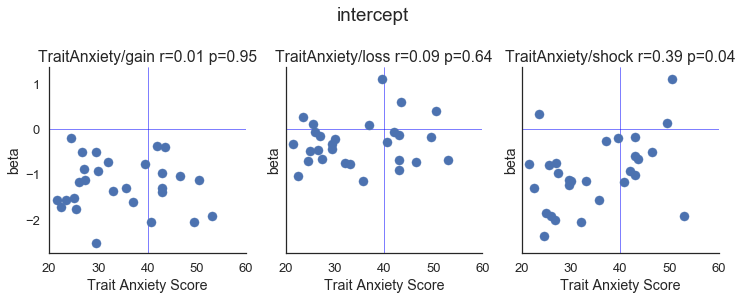

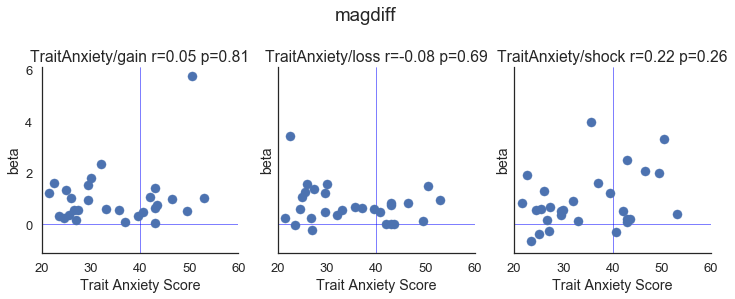

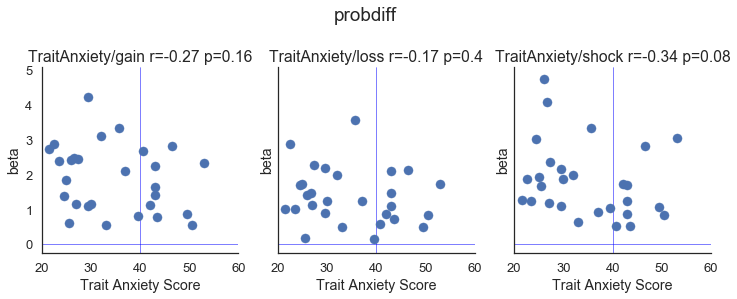

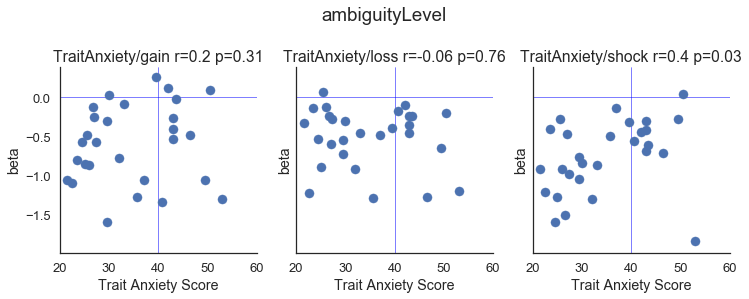

In [160]:
plotTrait_rl(triplet_intercept_STAI, 'intercept')
plotTrait_rl(triplet_magdiff_STAI, 'magdiff')
plotTrait_rl(triplet_probdiff_STAI, 'probdiff')
f = plotTrait_rl(triplet_ambiguityLevel_STAI, 'ambiguityLevel')

## Emma's model Unambiguous Trials 

<ul>
<li> prob(choose right)
<li> intercept 
<li> mag unambig
<li> prob unambig
</ul>

In [136]:
triplet_intercept_STAI = triplet_intercept_unambi.merge(STAI_df, 'left')
triplet_probdiff_STAI = triplet_probdiff_unambi.merge(STAI_df, 'left')
triplet_magdiff_STAI = triplet_magdiff_unambi.merge(STAI_df, 'left')

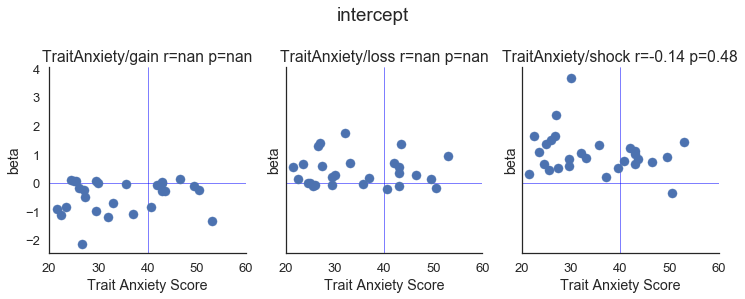

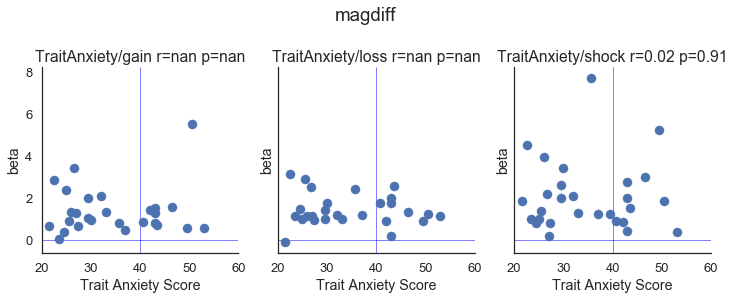

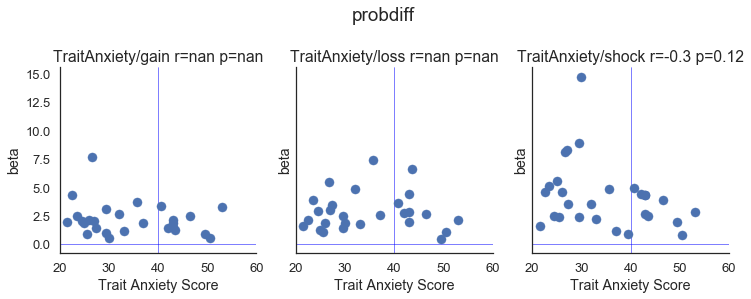

In [137]:
plotTrait_rl(triplet_intercept_STAI, 'intercept')
plotTrait_rl(triplet_magdiff_STAI, 'magdiff')
f = plotTrait_rl(triplet_probdiff_STAI, 'probdiff')

In [162]:
%%bash 
#jupyter nbconvert --to slides Clinical_DM_Learning_Rate_Difference_Anx_Dep.ipynb && mv Clinical_DM_Learning_Rate_Difference_Anx_Dep.slides.html Clinical_DM_Learning_Rate_Difference_Anx_Dep_v1.slides.html
#jupyter nbconvert --to html Example_analyze_emmas_fmri_shock_data.ipynb && mv Example_analyze_emmas_fmri_shock_data.html ../html_reports/Example_analyze_emmas_fmri_shock_data_v1.html
jupyter nbconvert --to pdf --template pdf_template_nocode.tplx Trait_Analysis_modelEmma.ipynb

cp Trait_Analysis_modelEmma.pdf ../reports/Trait_Analysis_modelEmma_12_29_17.pdf
cp Trait_Analysis_modelEmma.ipynb ../reports/Trait_Analysis_modelEmma_12_29_17.ipynb

[NbConvertApp] Converting notebook Trait_Analysis_modelEmma.ipynb to pdf
[NbConvertApp] Support files will be in Trait_Analysis_modelEmma_files/
[NbConvertApp] Making directory Trait_Analysis_modelEmma_files
[NbConvertApp] Making directory Trait_Analysis_modelEmma_files
[NbConvertApp] Making directory Trait_Analysis_modelEmma_files
[NbConvertApp] Making directory Trait_Analysis_modelEmma_files
[NbConvertApp] Making directory Trait_Analysis_modelEmma_files
[NbConvertApp] Making directory Trait_Analysis_modelEmma_files
[NbConvertApp] Making directory Trait_Analysis_modelEmma_files
[NbConvertApp] Making directory Trait_Analysis_modelEmma_files
[NbConvertApp] Writing 20155 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp